<a href="https://colab.research.google.com/github/raakeshmahato/Major-Project1/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Analyzing and Predicting Vitamin D Deficiency for Human Using Machine Learning`**

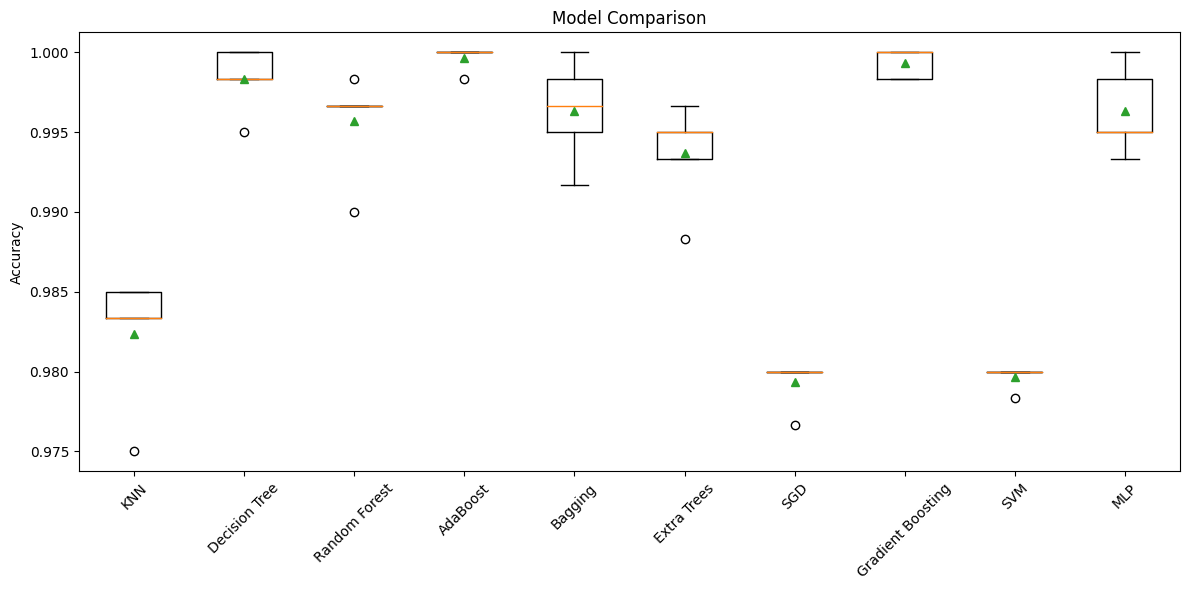

,0,1,2,3,4,Mean Accuracy,Standard Deviation
AdaBoost,1.000000,0.998333,1.000000,1.000000,1.000000,0.999667,0.000667
Gradient Boosting,1.000000,0.998333,1.000000,1.000000,0.998333,0.999333,0.000816
Decision Tree,1.000000,0.998333,0.995000,1.000000,0.998333,0.998333,0.001826
Bagging,0.996667,0.998333,0.991667,1.000000,0.995000,0.996333,0.002867
MLP,0.995000,0.995000,0.993333,1.000000,0.998333,0.996333,0.002449
Random Forest,0.996667,0.998333,0.990000,0.996667,0.996667,0.995667,0.002906
Extra Trees,0.993333,0.996667,0.988333,0.995000,0.995000,0.993667,0.002867
KNN,0.983333,0.985000,0.975000,0.985000,0.983333,0.982333,0.003742
SVM,0.980000,0.980000,0.980000,0.980000,0.978333,0.979667,0.000667
SGD,0.980000,0.980000,0.980000,0.980000,0.976667,0.979333,0.001333


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv('/content/vitamin_d_dataset_3000___Rakesh.csv')

# Encoding categorical columns
label_encoders = {}
for column in ['Gender', 'Sun Exposure', 'Dietary Intake', 'Physical Activity']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separating the features and the target
X = data.drop('Deficiency', axis=1)
y = data['Deficiency'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert to binary

# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=1000)  # Increased max_iter for convergence
}

# Evaluate each model using cross-validation
cv_results = {}
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    cv_results[name] = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Plot the results
plt.figure(figsize=(12, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys(), showmeans=True)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the results in a table
results_table = pd.DataFrame(cv_results).T
results_table['Mean Accuracy'] = results_table.mean(axis=1)
results_table['Standard Deviation'] = results_table.std(axis=1)
results_table.sort_values(by='Mean Accuracy', ascending=False, inplace=True)

results_table


**K-Nearest Neighbors (KNN) algorithm:**

Best K: 3 with Accuracy: 98.27%


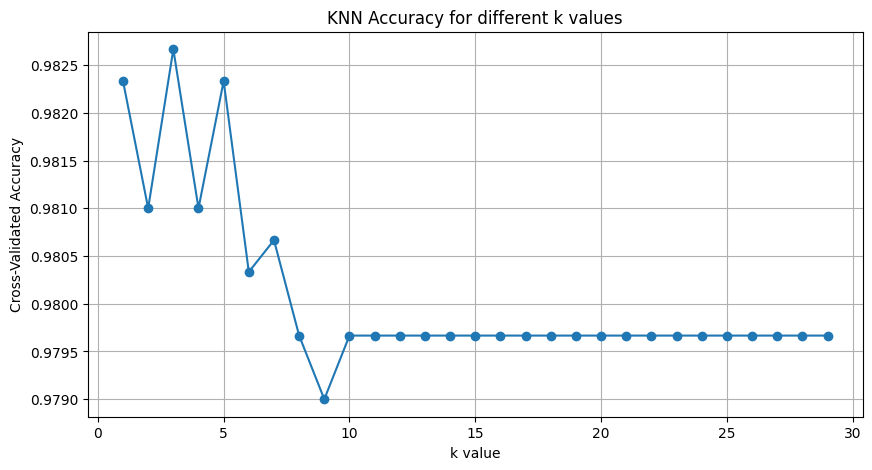

,k value,Accuracy
2,3,0.982667
0,1,0.982333
4,5,0.982333
1,2,0.981000
3,4,0.981000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv('/content/vitamin_d_dataset_3000___Rakesh.csv')

# Encoding categorical columns
label_encoders = {}
for column in ['Gender', 'Sun Exposure', 'Dietary Intake', 'Physical Activity']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separating the features and the target
X = data.drop('Deficiency', axis=1)
y = data['Deficiency'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert to binary

# Define the KNN model with a range of neighbors to try to achieve the desired accuracy
k_values = range(1, 30)
knn_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipeline = make_pipeline(StandardScaler(), knn)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    knn_scores.append(scores.mean())

# Find the k value that gives the highest accuracy
max_accuracy_k = k_values[knn_scores.index(max(knn_scores))]
print(f"Best K: {max_accuracy_k} with Accuracy: {max(knn_scores)*100:.2f}%")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_scores, marker='o')
plt.title('KNN Accuracy for different k values')
plt.xlabel('k value')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Display the results in a table
knn_results_table = pd.DataFrame({
    'k value': k_values,
    'Accuracy': knn_scores
}).sort_values(by='Accuracy', ascending=False)

knn_results_table.head()


**Decision Tree Classifier**

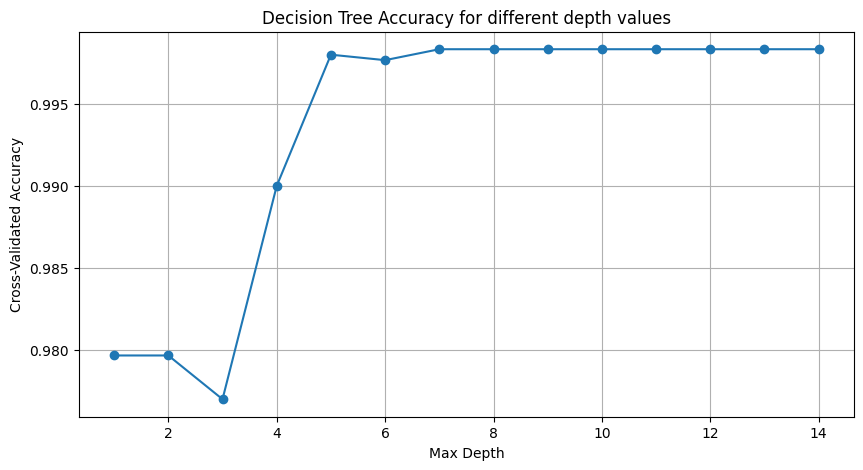

,Max Depth,Accuracy
6,7,0.998333
7,8,0.998333
8,9,0.998333
9,10,0.998333
10,11,0.998333


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree tends to overfit, so we will limit the depth of the tree
depth_values = range(1, 15)
dt_scores = []

for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    pipeline = make_pipeline(StandardScaler(), dt)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    dt_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(depth_values, dt_scores, marker='o')
plt.title('Decision Tree Accuracy for different depth values')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Display the results in a table
dt_results_table = pd.DataFrame({
    'Max Depth': depth_values,
    'Accuracy': dt_scores
}).sort_values(by='Accuracy', ascending=False)

dt_results_table.head()


**Random Forest Classifier**

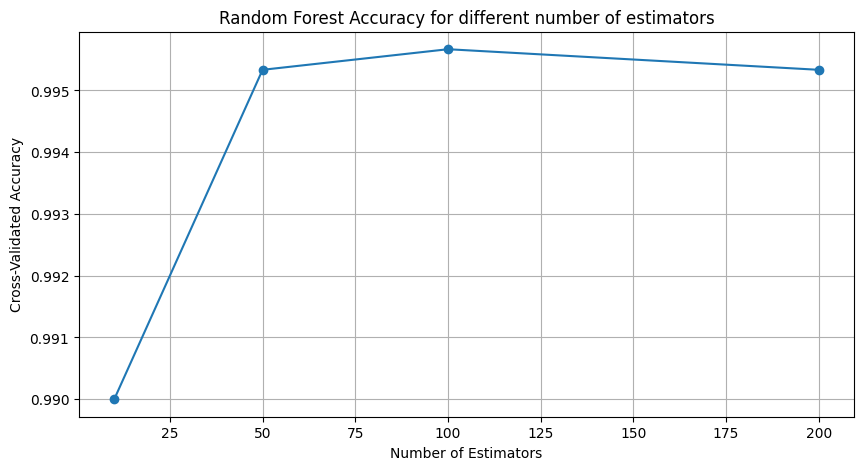

,Number of Estimators,Accuracy
2,100,0.995667
3,200,0.995333
1,50,0.995333
0,10,0.990000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest has many hyperparameters; we'll tweak the number of estimators
estimator_values = [10, 50, 100, 200]
rf_scores = []

for e in estimator_values:
    rf = RandomForestClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), rf)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(estimator_values, rf_scores, marker='o')
plt.title('Random Forest Accuracy for different number of estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Display the results in a table
rf_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'Accuracy': rf_scores
}).sort_values(by='Accuracy', ascending=False)

rf_results_table.head()


**Support Vector Machine**

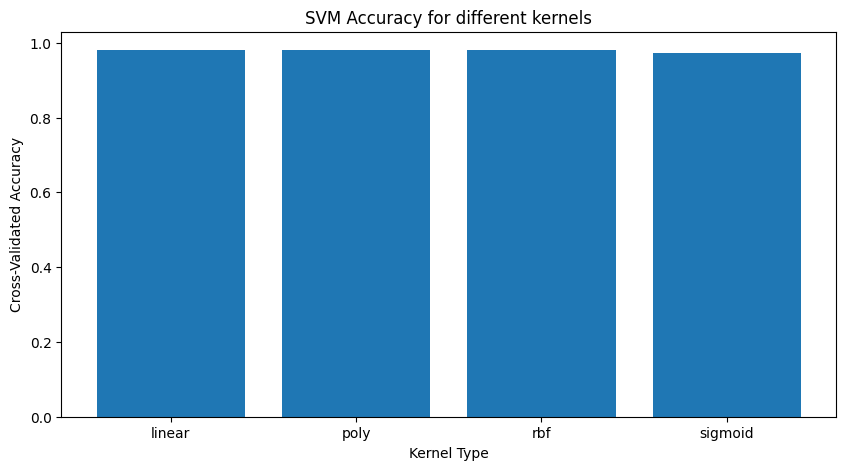

,Kernel Type,Accuracy
1,poly,0.980667
0,linear,0.979667
2,rbf,0.979667
3,sigmoid,0.973333


In [ ]:
from sklearn.svm import SVC

# For SVM, we will experiment with different kernel types
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
svm_scores = []

for k in kernel_types:
    svm = SVC(kernel=k, random_state=42)
    pipeline = make_pipeline(StandardScaler(), svm)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    svm_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(kernel_types, svm_scores)
plt.title('SVM Accuracy for different kernels')
plt.xlabel('Kernel Type')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Display the results in a table
svm_results_table = pd.DataFrame({
    'Kernel Type': kernel_types,
    'Accuracy': svm_scores
}).sort_values(by='Accuracy', ascending=False)

svm_results_table.head()


**Multi-Layer Perceptron**

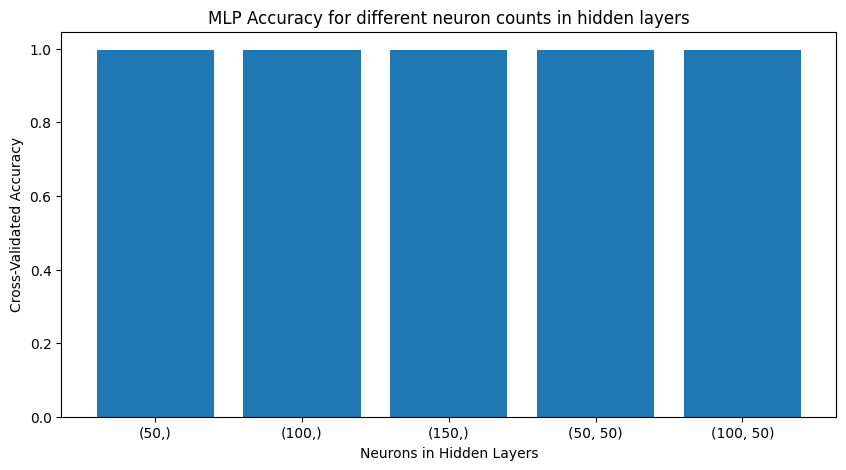

,Neurons in Hidden Layer,Accuracy
1,"(100,)",0.996333
2,"(150,)",0.996333
3,"(50, 50)",0.996000
4,"(100, 50)",0.996000
0,"(50,)",0.995667


In [ ]:
from sklearn.neural_network import MLPClassifier

# For MLP, one common parameter to adjust is the number of neurons in the hidden layer
neuron_counts = [(50,), (100,), (150,), (50, 50), (100, 50)]
mlp_scores = []

for neurons in neuron_counts:
    mlp = MLPClassifier(hidden_layer_sizes=neurons, random_state=42, max_iter=1000)
    pipeline = make_pipeline(StandardScaler(), mlp)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    mlp_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar([str(x) for x in neuron_counts], mlp_scores)
plt.title('MLP Accuracy for different neuron counts in hidden layers')
plt.xlabel('Neurons in Hidden Layers')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Display the results in a table
mlp_results_table = pd.DataFrame({
    'Neurons in Hidden Layer': [str(x) for x in neuron_counts],
    'Accuracy': mlp_scores
}).sort_values(by='Accuracy', ascending=False)

mlp_results_table.head()


**AdaBoost Classifier**

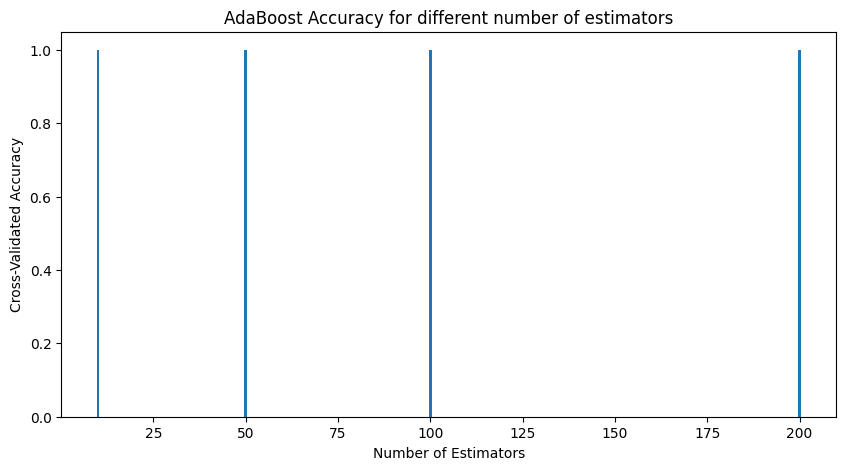

,Number of Estimators,Accuracy
0,10,0.999667
1,50,0.999667
2,100,0.999667
3,200,0.999667


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost hyperparameter tuning for the number of estimators
estimator_values = [10, 50, 100, 200]
ada_scores = []

for e in estimator_values:
    ada = AdaBoostClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), ada)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    ada_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(estimator_values, ada_scores)
plt.title('AdaBoost Accuracy for different number of estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Display the results in a table
ada_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'Accuracy': ada_scores
}).sort_values(by='Accuracy', ascending=False)

ada_results_table.head()


**Bagging Classifier**

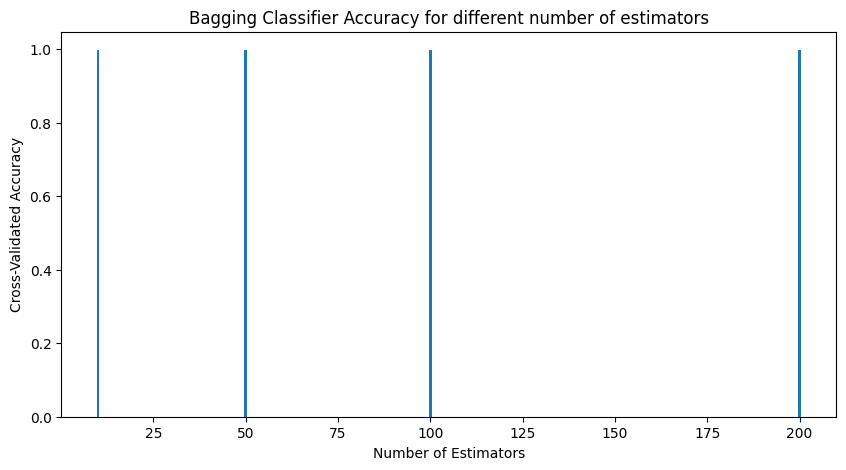

,Number of Estimators,Accuracy
3,200,0.997333
2,100,0.997000
1,50,0.996667
0,10,0.996333


In [ ]:
from sklearn.ensemble import BaggingClassifier

# Bagging hyperparameter tuning for the number of estimators
estimator_values = [10, 50, 100, 200]
bagging_scores = []

for e in estimator_values:
    bagging = BaggingClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), bagging)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    bagging_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(estimator_values, bagging_scores)
plt.title('Bagging Classifier Accuracy for different number of estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Display the results in a table
bagging_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'Accuracy': bagging_scores
}).sort_values(by='Accuracy', ascending=False)

bagging_results_table.head()


**Extra Trees Classifier**

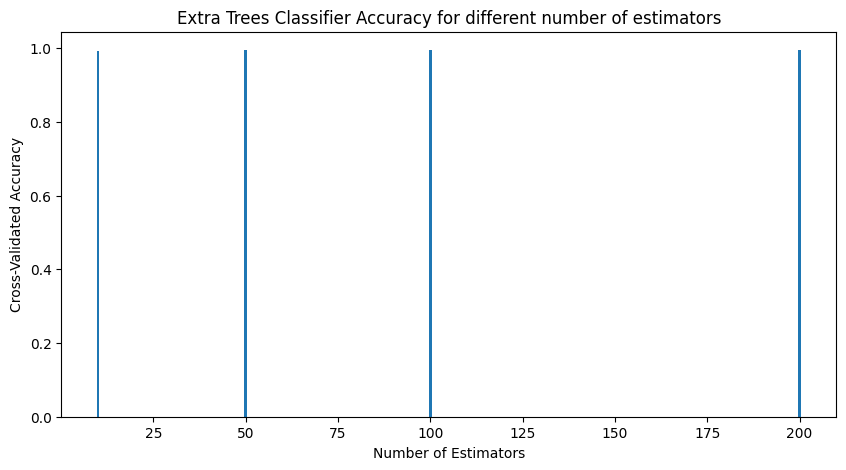

,Number of Estimators,Accuracy
3,200,0.994667
1,50,0.994000
2,100,0.993667
0,10,0.992667


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees hyperparameter tuning for the number of estimators
estimator_values = [10, 50, 100, 200]
extra_trees_scores = []

for e in estimator_values:
    extra_trees = ExtraTreesClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), extra_trees)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    extra_trees_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(estimator_values, extra_trees_scores)
plt.title('Extra Trees Classifier Accuracy for different number of estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Display the results in a table
extra_trees_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'Accuracy': extra_trees_scores
}).sort_values(by='Accuracy', ascending=False)

extra_trees_results_table.head()


**Stochastic Gradient Descent (SGD) Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

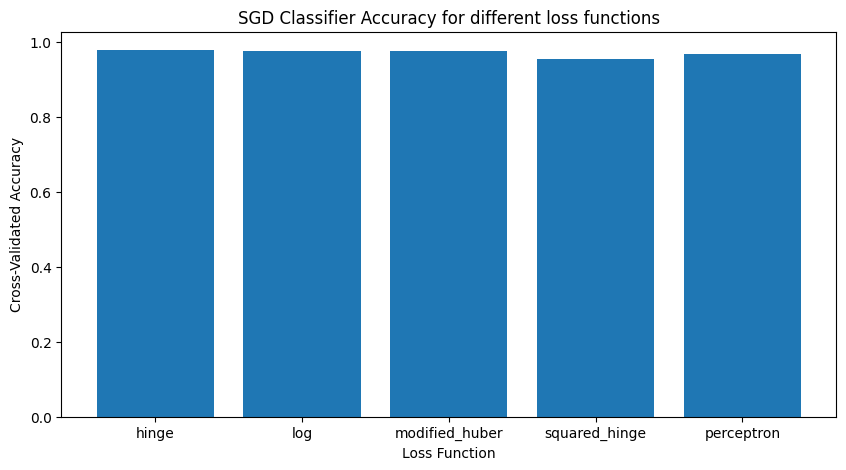

,Loss Function,Accuracy
0,hinge,0.979333
1,log,0.977333
2,modified_huber,0.976000
4,perceptron,0.968667
3,squared_hinge,0.955667


In [ ]:
from sklearn.linear_model import SGDClassifier

# SGD hyperparameter tuning for loss functions
loss_functions = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
sgd_scores = []

for loss in loss_functions:
    sgd = SGDClassifier(loss=loss, max_iter=1000, tol=1e-3, random_state=42)
    pipeline = make_pipeline(StandardScaler(), sgd)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    sgd_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(loss_functions, sgd_scores)
plt.title('SGD Classifier Accuracy for different loss functions')
plt.xlabel('Loss Function')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Display the results in a table
sgd_results_table = pd.DataFrame({
    'Loss Function': loss_functions,
    'Accuracy': sgd_scores
}).sort_values(by='Accuracy', ascending=False)

sgd_results_table.head()


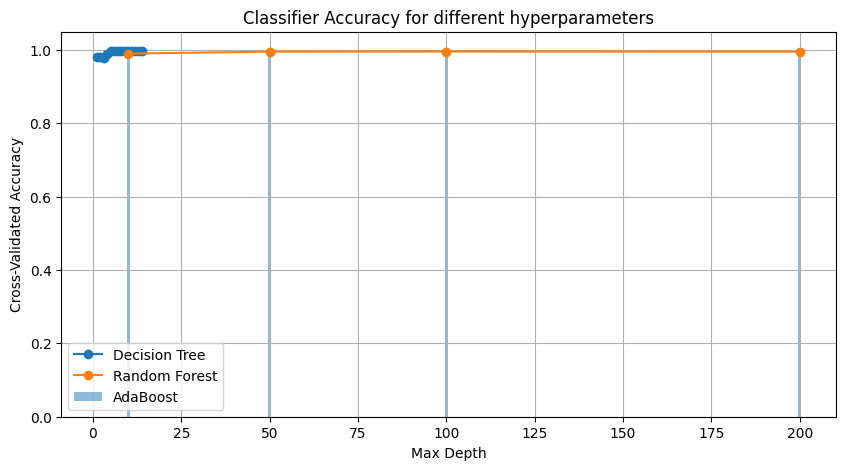

Decision Tree Results:
    Max Depth  Decision Tree Accuracy
6           7                0.998333
7           8                0.998333
8           9                0.998333
9          10                0.998333
10         11                0.998333

Random Forest Results:
   Number of Estimators  Random Forest Accuracy
2                   100                0.995667
3                   200                0.995333
1                    50                0.995333
0                    10                0.990000

AdaBoost Results:
   Number of Estimators  AdaBoost Accuracy
0                    10           0.999667
1                    50           0.999667
2                   100           0.999667
3                   200           0.999667


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Decision Tree
depth_values = range(1, 15)
dt_scores = []

for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    pipeline = make_pipeline(StandardScaler(), dt)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    dt_scores.append(scores.mean())

# Random Forest
estimator_values = [10, 50, 100, 200]
rf_scores = []

for e in estimator_values:
    rf = RandomForestClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), rf)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())

# AdaBoost
ada_scores = []

for e in estimator_values:
    ada = AdaBoostClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), ada)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    ada_scores.append(scores.mean())

# Plotting Decision Tree results
plt.figure(figsize=(10, 5))
plt.plot(depth_values, dt_scores, marker='o', label='Decision Tree')
plt.title('Classifier Accuracy for different hyperparameters')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)

# Plotting Random Forest results
plt.plot(estimator_values, rf_scores, marker='o', label='Random Forest')

# Plotting AdaBoost results
plt.bar(estimator_values, ada_scores, label='AdaBoost', alpha=0.5)

plt.legend()
plt.show()

# Displaying results in tables
dt_results_table = pd.DataFrame({
    'Max Depth': depth_values,
    'Decision Tree Accuracy': dt_scores
}).sort_values(by='Decision Tree Accuracy', ascending=False)

rf_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'Random Forest Accuracy': rf_scores
}).sort_values(by='Random Forest Accuracy', ascending=False)

ada_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'AdaBoost Accuracy': ada_scores
}).sort_values(by='AdaBoost Accuracy', ascending=False)

print("Decision Tree Results:")
print(dt_results_table.head())
print("\nRandom Forest Results:")
print(rf_results_table.head())
print("\nAdaBoost Results:")
print(ada_results_table.head())
